In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import csv
import os

In [2]:
rides_df = pd.read_csv('ride_data.csv')
city_df = pd.read_csv('city_data.csv')

In [8]:
all_ride_info_df = pd.merge(city_df, rides_df, how='outer', on='city')
all_ride_info_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


## Bubble Plot of Ride Sharing Data

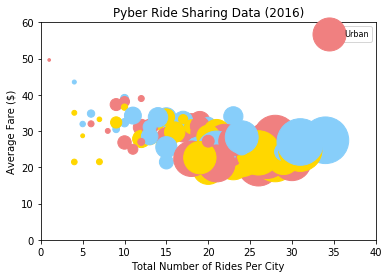

In [53]:
#Average Fare per City
group_by_type_city = all_ride_info_df.groupby(['type','city'])
avg_fare_by_city = group_by_city['fare'].mean()

#Total Number of Rides per City
nbr_rides_by_city = group_by_city['ride_id'].count()

#Total Number of Drivers per City
drivers_per_city = group_by_city['driver_count'].sum()

#City Types
city_type = []
for city in all_ride_info_df['type'].unique():
    city_type.append(city)


#plot the graph
plt.scatter(nbr_rides_by_city, avg_fare_by_city, marker="o", color=('#F08080','#87CEFA','#FFD700'), s=drivers_per_city)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare ($)')
plt.xlim(0, 40)
plt.ylim(0, 60)
plt.legend((city_type), scatterpoints=1, loc='upper right', ncol=3, fontsize=8)
plt.show()

## Total Fares by City Type

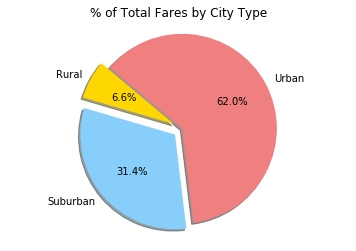

In [4]:
fares_by_city_type = all_ride_info_df.groupby(['type'])
fares_count_total = all_ride_info_df['fare'].sum()
fare_by_city_type_count = fares_by_city_type['fare'].sum()
fare_by_city_type_percentage = fare_by_city_type_count/fares_count_total

colors = ['#FFD700', '#87CEFA', '#F08080']
labels = ['Rural', 'Suburban', 'Urban']
plt.title("% of Total Fares by City Type")
plt.pie(fare_by_city_type_percentage, labels=labels, explode=(0.1, 0.1, 0), colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Total Rides by City Type

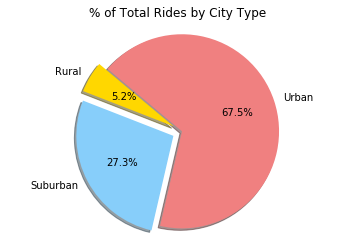

In [5]:
rides_by_city_type = all_ride_info_df.groupby(['type'])
rides_count_total = len(all_ride_info_df['ride_id'])
rides_by_city_type_count = rides_by_city_type['ride_id'].count()
rides_by_city_type_percentage = rides_by_city_type_count / rides_count_total

colors = ['#FFD700', '#87CEFA', '#F08080']
labels = ['Rural', 'Suburban', 'Urban']
plt.title("% of Total Rides by City Type")
plt.pie(rides_by_city_type_percentage, labels=labels, explode=(0.1, 0.1, 0), colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Total Drivers by City Type

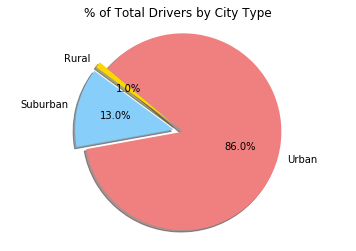

In [7]:
drivers_by_city_type = all_ride_info_df.groupby(['type'])
drivers_count_total = all_ride_info_df['driver_count'].sum()
drivers_by_city_type_count = drivers_by_city_type['driver_count'].sum()
drivers_by_city_type_percentage = drivers_by_city_type_count / drivers_count_total

colors = ['#FFD700', '#87CEFA', '#F08080']
labels = ['Rural', 'Suburban', 'Urban']
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_by_city_type_percentage, labels=labels, explode=(0.1, 0.1, 0), colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()